平均足を算出する

```python
def heikin_ashi(self):
    """Return HEIKIN ASHI columns"""
    self['hopen'] = (self.open.shift() + self.close.shift()) / 2
    self['hclose'] = (self[['open', 'high', 'low', 'close']]).mean(1)
    self['hhigh'] = self[['high', 'hopen', 'hclose']].max(1)
    self['hlow'] = self[['low', 'hopen', 'hclose']].min(1)
    return self[['hopen', 'hhigh', 'hlow', 'hclose']]


pd.DataFrame.heikin_ashi = heikin_ashi
```

In [19]:
import sys
sys.path.append('../../bin/')
from stockplot import StockPlot
from read_hst import read_hst

In [20]:
df = read_hst('/home/u1and0/Data/USDJPY.zip'); df.tail()

Extracting USDJPY.hst...


,open,high,low,close,volume
time,,,,,
2017-11-17 08:32:00,112.573,112.584,112.573,112.581,50.0
2017-11-17 08:33:00,112.581,112.583,112.578,112.580,38.0
2017-11-17 08:34:00,112.580,112.583,112.578,112.580,51.0
2017-11-17 08:35:00,112.580,112.580,112.572,112.572,44.0
2017-11-17 08:36:00,112.572,112.574,112.572,112.572,24.0


In [21]:
fx = StockPlot(df)
fx.resample('D')
fx.stock_dataframe.tail()

../../bin/stockplot.py:34: FutureWarning:


.resample() is now a deferred operation
You called columns(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead



,open,high,low,close
time,,,,
2017-11-13,113.456,113.703,113.235,113.612
2017-11-14,113.612,113.899,113.298,113.437
2017-11-15,113.437,113.485,112.466,112.861
2017-11-16,112.862,113.319,112.725,113.041
2017-11-17,113.030,113.131,112.383,112.572


In [22]:
start, end = pd.Timestamp('20170531'), pd.Timestamp('20170818')
fx.plot('heikin', start_plot=start, end_plot=end, start_view='first', end_view='last')
fx.show('jupyter')

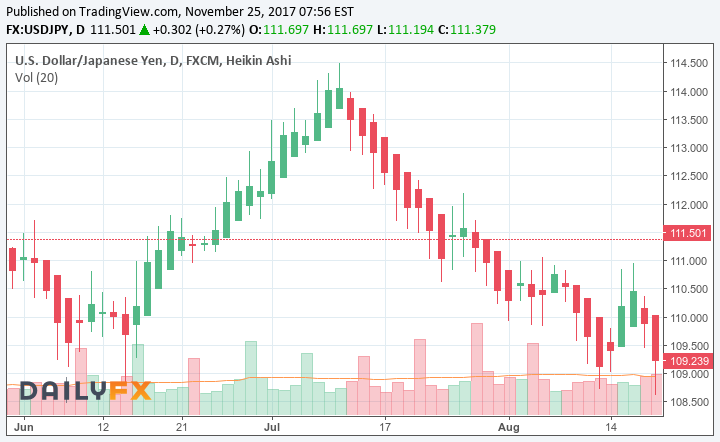

In [23]:
start, end = pd.Timestamp('20170123'), pd.Timestamp('20170404')
fx.plot('heikin', start_plot=start, end_plot=end, start_view='first', end_view='last')
fx.show('jupyter')

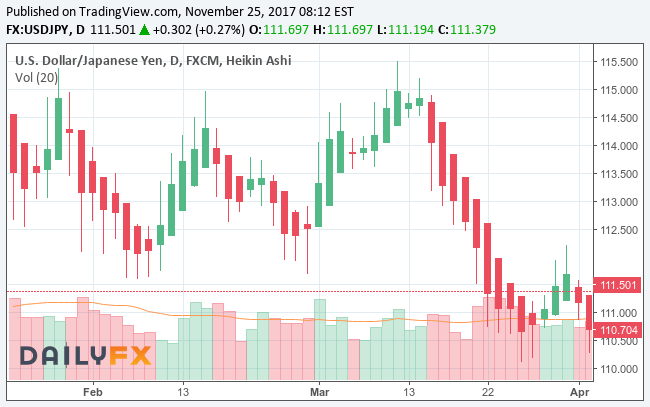

微妙に違うのなんでだろう
平均足改良の余地あり

In [17]:
fx.stock_dataframe.ix[pd.Timestamp('20170214'), ['hopen', 'hhigh', 'hlow', 'hclose']]

hopen     113.61250
hhigh     114.48800
hlow      113.24000
hclose    113.92075
Name: 2017-02-14 00:00:00, dtype: float64

dailyfx.comのデータは

2017/2/14

hopen    113.277

hhigh    114.501

hlow     113.274

hclose   113.933

In [14]:
start, end = pd.Timestamp('20170123'), pd.Timestamp('20170404')
fx.plot(start_plot=start, end_plot=end, start_view='first', end_view='last')
fx.show('jupyter')

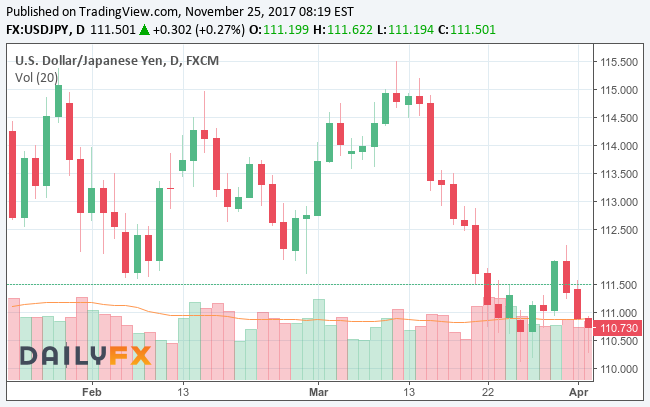

In [18]:
fx.stock_dataframe.ix[pd.Timestamp('20170214'), ['open', 'high', 'low', 'close']]

open     113.714
high     114.488
low      113.240
close    114.241
Name: 2017-02-14 00:00:00, dtype: float64

dailyfx.comのデータは

2017/2/14

open 113.726

high 114.501

low 113.247

close 114.257

...スプレッドかな！（諦）